In [1]:
from random import *
from time import *
import math
from math import comb
import sys
import matplotlib.pyplot as plt

In [2]:
# pour l'étiquetage

def random_shuffle(sigma):
    n = len(sigma)
    for i in range(1,n):
        j = randint(0,i) # dans l'intervalle $[0..i]$ 
        sigma[i],sigma[j]=sigma[j],sigma[i] # échange les cases d'indices $i$ et $j$

def random_permutation(n):
    sigma = [ i for i in range(1,n+1) ]
    random_shuffle(sigma)
    return sigma

In [3]:
def test_uniformity(gen, nb):
    dico = {}
    for i in range(nb):
        tmp = str(gen())
        if tmp in dico:
            dico[tmp] += 1
        else:
            dico[tmp] = 1
    print("nb:", len(dico))
    for key in dico:
        print(key, "{0:.2f}".format(dico[key] / nb * 100))

def plot_time(gen, mini, maxi, step):
    sizes, timings = [], []
    nb = 100
    for i in range(mini, maxi, step):
        sizes.append(i)        
        t1 = time()
        for k in range(nb):
            gen(i)
        timings.append((time() - t1) / nb)
    plt.plot(sizes, timings)
    plt.show()
    
def plot_values(gen, mini, maxi, step):
    sizes, values = [], []
    nb = 100
    for i in range(mini, maxi, step):
        sizes.append(i)        
        v = 0
        for k in range(nb):
            v += gen(i)
        values.append(v / nb)
    plt.plot(sizes,values)
    plt.show()

In [4]:
# M = Z + Z x Cyc(M) => M = Z + Z x C, tC = S x tM, S = 1 + M x S 

cmax = 600 # à 700, on obtient inf...
cM = [0]
cC = [1]
cS = [1]

for i in range(1,cmax+1):
    cM.append(cC[i-1])
    cC.append(sum(cS[i-k] * k * cM[k]/i for k in range(1,i+1)))
    cS.append(sum(cS[i-k] * cM[k] for k in range(1,i+1)))

print(cM[:6])
print(cC[:6])
print(cS[:6])

[0, 1, 1.0, 1.5, 2.833333333333333, 6.083333333333333]
[1, 1.0, 1.5, 2.833333333333333, 6.083333333333333, 14.116666666666667]
[1, 1, 2.0, 4.5, 10.833333333333332, 27.249999999999996]


In [5]:
print(cmax,cM[cmax])

600 5.936434713651471e+293


In [6]:
# M = Z + Z x Cyc(M) => M = Z + Z x C, tC = S x tM, S = 1 + M x S 

def genM(n):
    if n == 1:
        return ['z'] # Z
    return ['z']+genC(n-1)

def uniform_cutC(n):
    u = random()
    k = 0
    s = 0
    while u > s:
        k += 1
        s += k * cM[k] * cS[n-k] / (n * cC[n])  # tC = S x tM
    return k

def genC(n):
    if n == 0:
        return []
    k = uniform_cutC(n)
    return [genM(k)] + genS(n-k)


def uniform_cutS(n):
    u = random()
    k = 0
    s = 0
    while u > s:
        k += 1
        s += cM[k] * cS[n-k] / cS[n]  # S = 1 + M x S 
    return k

def genS(n):
    if n == 0:
        return []
    k = uniform_cutS(n)
    return [genM(k)] + genS(n-k)

def genM_labelled(n):
    p = random_permutation(n)

    def aux(t):
        if t == ['z']:
            return [p.pop()]
        return [p.pop()] + [aux(tt) for tt in t[1:]]  # tri pour imposer l'ordre d'affichage
    return aux(genM(n))

In [7]:
print(genM(20))

['z', ['z', ['z', ['z']], ['z'], ['z', ['z'], ['z'], ['z']], ['z', ['z'], ['z', ['z'], ['z'], ['z'], ['z']]]], ['z', ['z', ['z']]], ['z']]


In [8]:
print(genM_labelled(cmax))

[267, [282, [210, [128, [277, [65, [157, [414, [375, [48, [522, [195, [440, [387, [191, [239, [45, [306, [86, [215], [560], [500]], [141], [113], [297, [73]], [84], [354, [100, [450]], [288]]]]], [322]], [107, [499, [57]]], [183, [167]]]], [254, [236, [562, [552, [224, [539, [568, [197, [133, [77, [403, [501, [409], [504]]], [423, [482, [434]], [115, [441, [315, [509], [221]]]]], [317], [405, [42]], [481, [149, [333]], [159]]], [123, [453]]], [575], [332, [62, [351, [80, [465], [319, [515], [27]], [305, [424, [124], [198]], [536]]], [98]], [35, [438], [163]]]], [586], [24], [585], [480, [246, [418, [173, [91, [395, [3, [469, [156, [41, [362, [226, [510, [474]]]]], [561]]], [376], [177, [489]], [26, [550], [112], [212]]]]]], [422, [555]]], [213], [266]]], [15], [233, [192, [290], [64]]], [31, [513, [309]]], [58]], [259], [114], [237, [219, [28, [429, [137, [567]]], [344], [5], [214, [14, [462]]]], [119, [311], [110, [449]]]], [121, [307]], [381], [493, [338]]], [407], [517], [153, [190]

In [9]:
test_uniformity(lambda : genM_labelled(3),1000000)
print(100/9.)
#print(100/68.)

nb: 12
[1, [2], [3]] 5.57
[3, [1, [2]]] 11.08
[2, [3, [1]]] 11.11
[1, [3, [2]]] 11.06
[2, [1], [3]] 5.53
[2, [3], [1]] 5.53
[2, [1, [3]]] 11.15
[3, [2, [1]]] 11.19
[1, [2, [3]]] 11.12
[3, [2], [1]] 5.55
[1, [3], [2]] 5.53
[3, [1], [2]] 5.57
11.11111111111111


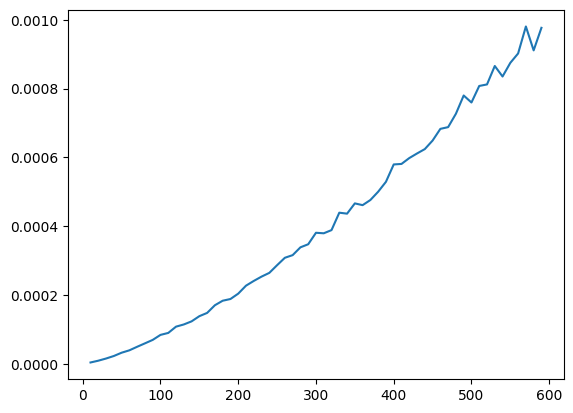

In [10]:
plot_time(genM, 10, cmax, 10)

In [11]:
def profiles(nb, size): # nombre de noeuds moyen à chaque hauteur
    heights = [0]
    def p(t,h):
        if h == len(heights):
            heights.append(1)
        else:
            heights[h]+=1
        if t!=():
            for st in t[1:]:
                p(st,h+1)
    for _ in range(nb):
        t = genM(size)
        p(t,0)
    return [heights[i]/nb for i in range(len(heights))]

78


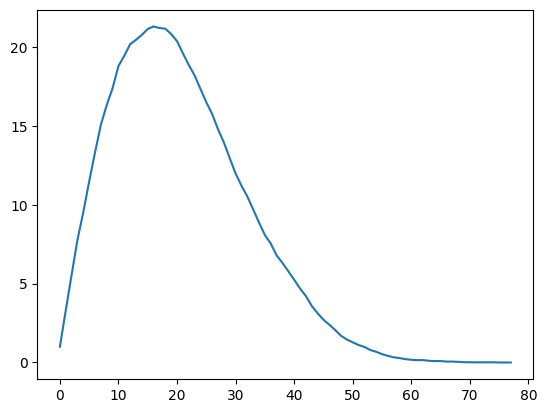

In [12]:
ps = profiles(1000,cmax)
print(len(ps))
plt.plot(ps)
plt.show()